In [13]:
import baostock as bs
import pandas as pd
import mplfinance as mpf
import numpy as np

# 登录baostock系统
lg = bs.login()

# 获取上证指数的历史K线数据，同时过滤非交易日
symbol = "sh.000001"  # 上证指数代码
start_date = '2024-01-01'
end_date = '2025-01-01'
frequency = 'd'  # 日线数据
fields = "date,open,high,low,close,volume"

# 获取股票数据
rs = bs.query_history_k_data(symbol,
                              "date,open,high,low,close,volume",
                              start_date=start_date,
                              end_date=end_date,
                              frequency="d",
                              adjustflag="3")  # adjustflag="3"表示不复权
data = rs.get_data()

# 去除空值
data = data.dropna()

# 将数据重新格式化以适应mplfinance的要求
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

# 转换为float
data[['open', 'high', 'low', 'close', 'volume']] = data[['open', 'high', 'low', 'close', 'volume']].astype(float)

# 登出baostock系统
bs.logout()

login success!
logout success!


In [14]:
data

,open,high,low,close,volume
date,,,,,
2024-01-02,2972.7750,2976.2682,2962.2762,2962.2762,3.041418e+10
2024-01-03,2957.1117,2971.2834,2953.2901,2967.2472,2.854559e+10
2024-01-04,2965.5087,2966.6828,2936.6347,2954.3486,2.649809e+10
2024-01-05,2949.8221,2967.9677,2916.7206,2929.1833,3.010402e+10
2024-01-08,2923.4570,2924.4559,2887.5379,2887.5379,2.702751e+10
2024-01-09,2887.1095,2900.7266,2878.4123,2893.2513,2.629560e+10
2024-01-10,2886.9807,2903.1621,2870.4155,2877.7023,2.440465e+10
2024-01-11,2873.7982,2896.1788,2867.7223,2886.6502,2.670508e+10
2024-01-12,2880.0399,2904.1743,2878.8752,2881.9769,2.616029e+10


In [15]:
# 选择任意两个 low 数据
low_data = data[['low']].iloc[[2, 6]]  # 这里选择了第3和第6个数据点
low_data 

,low
date,
2024-01-04,2936.6347
2024-01-10,2870.4155


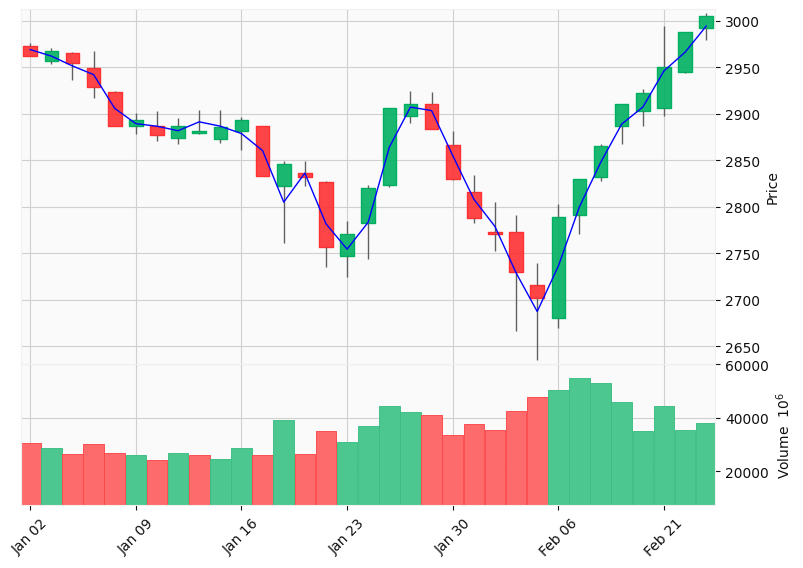

In [16]:
lines = [
    mpf.make_addplot((data["low"]+data["high"])/2, color="b", width=1),
]

# 绘制K线图并添加连接线
mpf.plot(data, addplot=lines, type='candle', style='yahoo', volume=True, show_nontrading=False, tight_layout=True)